In [14]:
import sys

from PyQt5.QtCore import QThread, Qt, pyqtSignal, pyqtSlot
from PyQt5.QtGui import QImage, QPixmap

import argparse
import glob
import multiprocessing as mp
import os
import time
import cv2
import tqdm
import sys
import numpy as np

#TODO : this is a temporary expedient

sys.path.append('/home/josmar/proyectos/centermask2')
from detectron2.data.detection_utils import read_image
from detectron2.utils.logger import setup_logger
from detectron2.engine.defaults import DefaultPredictor

from centermask.config import get_cfg

In [2]:
class CentermaskArgs:
    config_file = "/home/josmar/proyectos/codes/03_model_visualizer/pyqt_window/centermask2_files/configs/centermask/centermask_lite_V_39_eSE_FPN_ms_4x.yaml"
    webcam =  1 # 'Take inputs from webcam.'
    video_input = None #"/media/josmar/Nuevo vol/Dataset Casia/DatasetB-1/video/001-bg-01-000.avi" #'Path to video file.'
    input =   None #'A list of space separated input images'
    output =  None#'A file or directory to save output visualizations. '
    confidence_threshold = 0.4
    opts = ["MODEL.WEIGHTS","/home/josmar/proyectos/codes/03_model_visualizer/pyqt_window/centermask2_files/weights/centermask2-lite-V-39-eSE-FPN-ms-4x-ordered_run1.pth",
    "MODEL.FCOS.NUM_CLASSES", "1"]

    show_image = True
    show_boxes=True
    show_labels=True
    set_alpha=1
    img_binary = True

In [3]:
def setup_cfg(args):
    # load config from file and command-line arguments
    cfg = get_cfg()
    cfg.merge_from_file(args.config_file)
    cfg.merge_from_list(args.opts)
    # Set score_threshold for builtin models
    cfg.MODEL.RETINANET.SCORE_THRESH_TEST = args.confidence_threshold
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = args.confidence_threshold
    cfg.MODEL.FCOS.INFERENCE_TH_TEST = args.confidence_threshold
    cfg.MODEL.PANOPTIC_FPN.COMBINE.INSTANCES_CONFIDENCE_THRESH = args.confidence_threshold
    cfg.freeze()
    return cfg

In [4]:
args = CentermaskArgs()
cfg = setup_cfg(args)
predictor = DefaultPredictor(cfg)

Config '/home/josmar/proyectos/codes/03_model_visualizer/pyqt_window/centermask2_files/configs/centermask/centermask_lite_V_39_eSE_FPN_ms_4x.yaml' has no VERSION. Assuming it to be compatible with latest v2.


In [8]:
img_path = "/home/josmar/proyectos/codes/03_model_visualizer/pyqt_window/test/in/001-bg-01-090-088.jpg"
img = cv2.imread(img_path)

In [9]:
results = predictor(img)

In [10]:
results

{'instances': Instances(num_instances=1, image_height=240, image_width=320, fields=[pred_boxes: Boxes(tensor([[ 19.4673,  56.8159,  76.0214, 192.4456]], device='cuda:0')), scores: tensor([0.8963], device='cuda:0'), pred_classes: tensor([0], device='cuda:0'), locations: tensor([[112., 304.]], device='cuda:0'), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False]]], device='cuda:0'), mask_scores: tensor([0.8017], device='cuda:0')])}

In [34]:
mask= results['instances'].get('pred_masks')
mask= mask.to('cpu')
num, h, w= mask.shape
bin_mask= np.zeros((h, w))

In [35]:
for m in mask:
    sil = m.numpy()
    print(sil)
    bin_mask += sil


[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


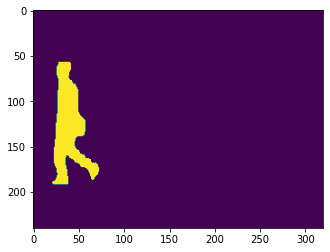

In [36]:
import matplotlib.pyplot as plt
plt.imshow(bin_mask)

In [41]:
out_path = "/home/josmar/proyectos/codes/03_model_visualizer/pyqt_window/test/out/im.png"
cv2.imwrite(out_path, bin_mask*255)

True

In [47]:
img2 = cv2.imread(out_path)
np.unique(img2.reshape(-1, img2.shape[2]), axis=0)

array([[0, 0, 0],
       [1, 1, 1]], dtype=uint8)

In [46]:
mask.numpy().shape

(1, 240, 320)